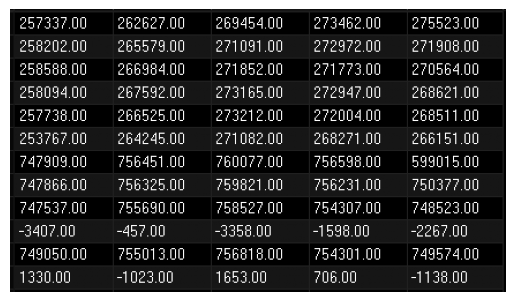

In [103]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('data/2025-01-13/img_test.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

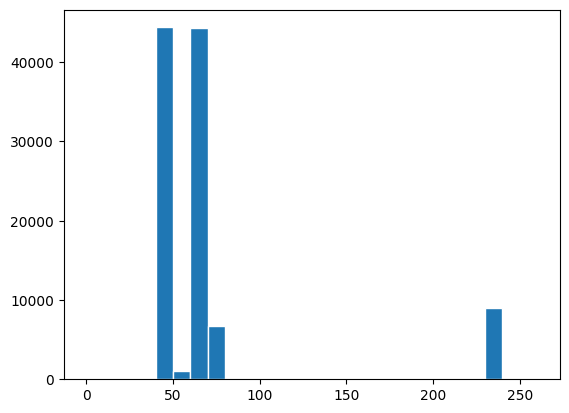

In [104]:
import numpy as np
plt.hist(np.array(img).flatten(), edgecolor='white', bins=np.arange(0,261,10))
plt.show()

In [105]:
numbers = pytesseract.image_to_string(img, config=custom_config)
numbers

'257337.00262627.00-26945400273462.00275523.00\n25820200288579.00271091.00272972.00271908.00\n258586.00288984.00271852.00271773.00-270564.00\n25809400267592.00273765.00272947.00268621.00\n257738.00288625.00279212.00272004.00-268511.00\n253767.00284245.00271082.00288271.00266151.00\n747909.00756451.00760077.00788698.00599015.00\n747866.00756325.00759827.00788231.00750377.00\n747537.00755890.00758527.00764307.00748523.00\n-3407.00-457.00 -336800-1598.00-2287.00\n749050.00755013.00756818.00764301.00749574.00\n1330.00 1023.001653.00 706.00 1138.00\n'

In [106]:
numbers_list = numbers.split('\n')

while '' in numbers_list:
    numbers_list.remove('')
numbers_list

['257337.00262627.00-26945400273462.00275523.00',
 '25820200288579.00271091.00272972.00271908.00',
 '258586.00288984.00271852.00271773.00-270564.00',
 '25809400267592.00273765.00272947.00268621.00',
 '257738.00288625.00279212.00272004.00-268511.00',
 '253767.00284245.00271082.00288271.00266151.00',
 '747909.00756451.00760077.00788698.00599015.00',
 '747866.00756325.00759827.00788231.00750377.00',
 '747537.00755890.00758527.00764307.00748523.00',
 '-3407.00-457.00 -336800-1598.00-2287.00',
 '749050.00755013.00756818.00764301.00749574.00',
 '1330.00 1023.001653.00 706.00 1138.00']

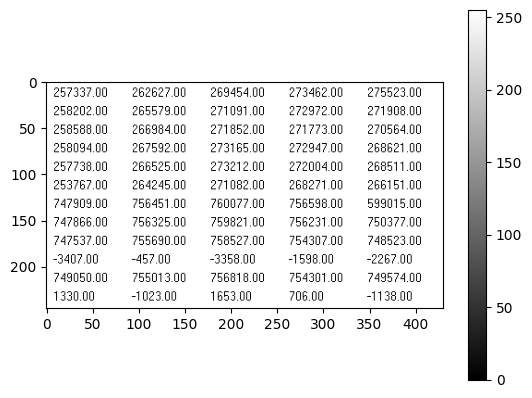

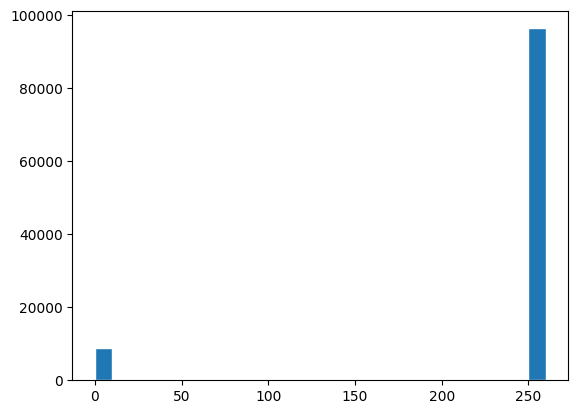

In [107]:
_, binary = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)
plt.imshow(binary, cmap='gray')
plt.colorbar()
plt.show()

plt.hist(np.array(binary).flatten(), edgecolor='white', bins=np.arange(0,261,10))
plt.show()

In [113]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

custom_config = r'--oem 3 --psm 6 outputbase digits'
numbers = pytesseract.image_to_string(binary, config=custom_config)
numbers

'257337.00262627.00-26945400-273462.00275523.00\n258202.00288579.00271091.00272972.00271908.00\n258586.00268984.00271852.00271773.00-270864.00\n25809400267592.00273165.00272947.00268621.00\n257738.00288625.00279212.00272004.00-268511.00\n259767.00284245.00271082.00288271.00266151.00\n77.00756451.00760077.00788698.00599015.00\n747866.00758325.00759827.00788231.00750377.00\n747637.00755890.00758527.00784307.00748523.00\n-3407.00-487.00 335800-1598.00-2267.00\n749060.00755013.00756818.00784301.00749574.00\n1330.00 1023.001853.00 706.00 1138.00\n'

In [114]:
numbers_list = numbers.split('\n')

while '' in numbers_list:
    numbers_list.remove('')
numbers_list

['257337.00262627.00-26945400-273462.00275523.00',
 '258202.00288579.00271091.00272972.00271908.00',
 '258586.00268984.00271852.00271773.00-270864.00',
 '25809400267592.00273165.00272947.00268621.00',
 '257738.00288625.00279212.00272004.00-268511.00',
 '259767.00284245.00271082.00288271.00266151.00',
 '77.00756451.00760077.00788698.00599015.00',
 '747866.00758325.00759827.00788231.00750377.00',
 '747637.00755890.00758527.00784307.00748523.00',
 '-3407.00-487.00 335800-1598.00-2267.00',
 '749060.00755013.00756818.00784301.00749574.00',
 '1330.00 1023.001853.00 706.00 1138.00']

In [124]:
import re
row = []
len
for i in range(len(numbers_list)):
    row.append(re.findall(r'[-+]?\d+\.00', numbers_list[i]))
    
    # temp = [] # initiate the temp for every row
    # if len(row[i]) != 5: # when something's wrong
    #     for j in row[i]:
    #         temp.extend(elem.split('00'))
    #     while '' in temp:
    #         temp.remove('')
    #     row.append(list(map(float, temp)))
row

[['257337.00', '262627.00', '-273462.00', '275523.00'],
 ['258202.00', '288579.00', '271091.00', '272972.00', '271908.00'],
 ['258586.00', '268984.00', '271852.00', '271773.00', '-270864.00'],
 ['25809400267592.00', '273165.00', '272947.00', '268621.00'],
 ['257738.00', '288625.00', '279212.00', '272004.00', '-268511.00'],
 ['259767.00', '284245.00', '271082.00', '288271.00', '266151.00'],
 ['77.00', '756451.00', '760077.00', '788698.00', '599015.00'],
 ['747866.00', '758325.00', '759827.00', '788231.00', '750377.00'],
 ['747637.00', '755890.00', '758527.00', '784307.00', '748523.00'],
 ['-3407.00', '-487.00', '-1598.00', '-2267.00'],
 ['749060.00', '755013.00', '756818.00', '784301.00', '749574.00'],
 ['1330.00', '1023.00', '1853.00', '706.00', '1138.00']]

MemoryError: 

In [ ]:
test = ['25809400267592.00', '273165.00', '272947.00', '268621.00']
if len(test) !=5: # corret errors
    for idx, elem in enumerate(test):
        test.insert(idx, np.array(elem.split('00').flatten())
test

In [ ]:
for idx, val in enumerate(numbers_list):
    if len(val) != 5:
        for 
    row.append(val.split('00'))

In [127]:
row = []
for idx, val in enumerate(numbers_list):
    row.append(val.split('00'))
row

[['257337.', '262627.', '-269454', '-273462.', '275523.', ''],
 ['258202.', '288579.', '271091.', '272972.', '271908.', ''],
 ['258586.', '268984.', '271852.', '271773.', '-270864.', ''],
 ['258094', '267592.', '273165.', '272947.', '268621.', ''],
 ['257738.', '288625.', '279212.', '272', '4.', '-268511.', ''],
 ['259767.', '284245.', '271082.', '288271.', '266151.', ''],
 ['77.', '756451.', '76', '77.', '788698.', '599015.', ''],
 ['747866.', '758325.', '759827.', '788231.', '750377.', ''],
 ['747637.', '755890.', '758527.', '784307.', '748523.', ''],
 ['-3407.', '-487.', ' 3358', '-1598.', '-2267.', ''],
 ['749060.', '755013.', '756818.', '784301.', '749574.', ''],
 ['1330.', ' 1023.', '1853.', ' 706.', ' 1138.', '']]

In [132]:
rows = []
for idx, val in enumerate(numbers_list):
    rows.append(val.split('00'))
for idx, val in enumerate(rows):
    if len(val) != 6: # replaced with regex
        rows[idx] = re.findall(r'[-+]?\d+\.00', numbers_list[idx])
    while '' in val:
        val.remove('')
    rows[idx] = list(map(float, rows[idx]))
rows

[[257337.0, 262627.0, -269454.0, -273462.0, 275523.0],
 [258202.0, 288579.0, 271091.0, 272972.0, 271908.0],
 [258586.0, 268984.0, 271852.0, 271773.0, -270864.0],
 [258094.0, 267592.0, 273165.0, 272947.0, 268621.0],
 [257738.0, 288625.0, 279212.0, 272004.0, -268511.0],
 [259767.0, 284245.0, 271082.0, 288271.0, 266151.0],
 [77.0, 756451.0, 760077.0, 788698.0, 599015.0],
 [747866.0, 758325.0, 759827.0, 788231.0, 750377.0],
 [747637.0, 755890.0, 758527.0, 784307.0, 748523.0],
 [-3407.0, -487.0, 3358.0, -1598.0, -2267.0],
 [749060.0, 755013.0, 756818.0, 784301.0, 749574.0],
 [1330.0, 1023.0, 1853.0, 706.0, 1138.0]]

In [ ]:
rows[idx] = list(map(float, rows[idx]))

In [133]:
test = [-1, 2]
abs(test)

TypeError: bad operand type for abs(): 'list'